# Raw Data Processing

In [1]:
# !pip3 install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here is the raw data:

In [3]:
datafile = '../../../fulldata/raw/rawEyePupilometryData.csv'
rawEyePupilometryData = pd.read_csv(datafile)
rawEyePupilometryData

,Unnamed: 0,subject,sample,time,trial,currentobject,rt,right_pupil,left_pupil,right_gaze_x,...,left_gaze_y,goal,feedback,reward,bi_goal,bi_feedback,bi_reward,tir_goal,tir_reward,label_7
0,42934315,845,1,342413,1,Timer,284,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,1.0,NaN,NaN,2.0,NaN,3.0
1,42934316,845,2,342421,1,Timer,284,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,1.0,NaN,NaN,2.0,NaN,3.0
2,42934317,845,3,342430,1,Timer,284,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,1.0,NaN,NaN,2.0,NaN,3.0
3,42934318,845,4,342439,1,Timer,284,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,1.0,NaN,NaN,2.0,NaN,3.0
4,42934319,845,5,342446,1,Timer,284,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,1.0,NaN,NaN,2.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978654,49118404,879,76207,1135405,57,Zeros,312,4.619684,4.491003,0.646441,...,0.480423,1.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,2.0
5978655,49118405,879,76208,1135413,57,Zeros,312,4.538852,4.448004,0.666709,...,0.470624,1.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,2.0
5978656,49118406,879,76209,1135422,57,Zeros,312,4.474381,4.444111,0.686095,...,0.476522,1.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,2.0
5978657,49118407,879,76210,1135430,57,Zeros,312,4.575100,4.436434,0.656369,...,0.457978,1.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,2.0


As part of the project, I filtered out the data to only include tests that were deemed valid. Then I structured the data to be in timestep-feature form.

In [4]:
cleanedData = pd.read_pickle('../../../fulldata/processed/cleanedData.pkl')
cleanedSubjectInfo = pd.read_pickle('../../../fulldata/processed/cleanedSubjectInfo.pkl')

In [5]:
cleanedData

,subject,time,trial,currentobject,rt,right_pupil,left_pupil,right_gaze_x,right_gaze_y,left_gaze_x,left_gaze_y
st,,,,,,,,,,,
"(848, 124)",848,1749235,124,NaN,19,3.897607,3.883394,0.509153,0.704280,0.622452,0.721363
"(848, 124)",848,1749243,124,Fixation,19,NaN,NaN,NaN,NaN,NaN,NaN
"(848, 124)",848,1749251,124,Fixation,19,NaN,NaN,NaN,NaN,NaN,NaN
"(848, 124)",848,1749259,124,Fixation,19,3.491655,3.542483,0.582957,0.736508,0.673403,0.743628
"(848, 124)",848,1749268,124,Fixation,19,3.813403,3.871302,0.497725,0.761927,0.599905,0.771075
...,...,...,...,...,...,...,...,...,...,...,...
"(865, 140)",865,2075600,140,Feedback,7125,3.692665,3.664004,NaN,1.509906,NaN,1.515521
"(865, 140)",865,2075608,140,Feedback,7125,NaN,NaN,NaN,NaN,NaN,NaN
"(865, 140)",865,2075616,140,Feedback,7125,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cleanedSubjectInfo

,subject,trial,rt
st,,,
"(848, 124)",848,124,19
"(877, 58)",877,58,147
"(845, 71)",845,71,221
"(855, 133)",855,133,245
"(856, 3)",856,3,247
...,...,...,...
"(877, 88)",877,88,2705
"(865, 132)",865,132,4717
"(863, 140)",863,140,5105


# Outlier Removal

we remove outliers from the data. We do this by removing any data where the reaction time is less that 200ms and over 950 millisecconds. The result of the outlier removal is shown below.

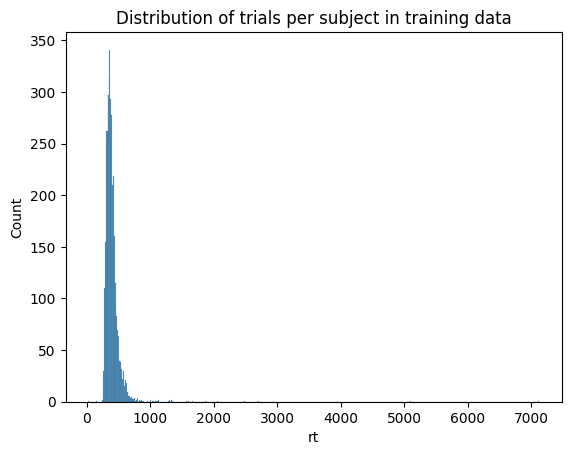

Number of trials before outlier removal:   4477
Average Before Outlier Removal:            396.76412776412775
Standard Deviation Before Outlier Removal: 199.6047238461721


In [7]:
plt.figure()
plt.title('Distribution of trials per subject in training data')
sns.histplot(data=cleanedSubjectInfo, x="rt")
plt.show()
print('Number of trials before outlier removal:  ', cleanedSubjectInfo.shape[0])
print('Average Before Outlier Removal:           ', cleanedSubjectInfo.rt.mean())
print('Standard Deviation Before Outlier Removal:', cleanedSubjectInfo.rt.std())

In [8]:
cleanedSubjectInfo = cleanedSubjectInfo.query('220 < rt < 950')

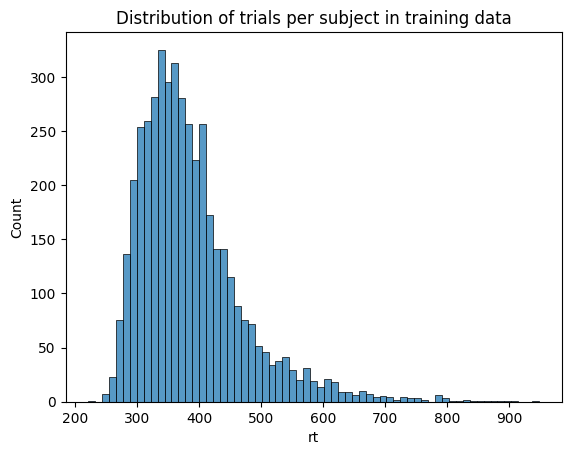

Number of trials after outlier removal:   4444
Average after outlier Removal:            385.93789378937896
Standard deviation after outlier removal: 85.70721909273932


In [9]:
plt.figure()
plt.title('Distribution of trials per subject in training data')
sns.histplot(data=cleanedSubjectInfo, x="rt")
plt.show()
print('Number of trials after outlier removal:  ', cleanedSubjectInfo.shape[0])
print('Average after outlier Removal:           ', cleanedSubjectInfo.rt.mean())
print('Standard deviation after outlier removal:', cleanedSubjectInfo.rt.std())

You can see that by removing the outliers, we have a much nicer distribution of reaction times.

# Training and Testing Split

we split the data into training and testing sets. The training set is used to train the models, and the testing set is used to test the models. The training set is 80% of the data, and the testing set is 20% of the data.

In [10]:
len(cleanedSubjectInfo)*0.9

3999.6

In [11]:
np.random.seed(1337)
data_index = np.random.permutation(cleanedSubjectInfo.index.to_numpy())
training_data_index = data_index[:4000]
testing_data_index = data_index[4000:]

trainingSubjectInfo = cleanedSubjectInfo.loc[training_data_index]
trainingSubjectInfo.to_pickle('../../../fulldata/processed/trainingSubjectInfo.pkl')

testingSubjectInfo = cleanedSubjectInfo.loc[testing_data_index]
testingSubjectInfo.to_pickle('../../../fulldata/processed/testingSubjectInfo.pkl')

In [12]:
trainingData = cleanedData.loc[training_data_index]
testingData = cleanedData.loc[testing_data_index]
trainingData.to_pickle('../../../fulldata/processed/trainingData.pkl')
testingData.to_pickle('../../../fulldata/processed/testingData.pkl')

In [13]:
print('number of timesteps in training data:      ',len(trainingData))
print('number of timesteps in testing data:        ',len(testingData))
print('number of trials in training data:            ',len(trainingSubjectInfo))
print('number of trials in testing data:              ',len(testingSubjectInfo))
print('number of unique subjects in training data:     ',len(trainingSubjectInfo.subject.unique()))
print('number of unique subjects in training data:     ',len(testingSubjectInfo.subject.unique()))

number of timesteps in training data:       5199672
number of timesteps in testing data:         582842
number of trials in training data:             4000
number of trials in testing data:               444
number of unique subjects in training data:      34
number of unique subjects in training data:      34


In [14]:
cleanedSubjectInfo

,subject,trial,rt
st,,,
"(845, 71)",845,71,221
"(855, 133)",855,133,245
"(856, 3)",856,3,247
"(856, 2)",856,2,249
"(857, 117)",857,117,250
...,...,...,...
"(866, 68)",866,68,873
"(872, 73)",872,73,883
"(861, 48)",861,48,896


In [15]:
trainingSubjectInfo

,subject,trial,rt
st,,,
"(846, 76)",846,76,451
"(860, 17)",860,17,357
"(874, 63)",874,63,353
"(868, 96)",868,96,365
"(876, 125)",876,125,342
...,...,...,...
"(856, 60)",856,60,317
"(853, 74)",853,74,456
"(860, 7)",860,7,367


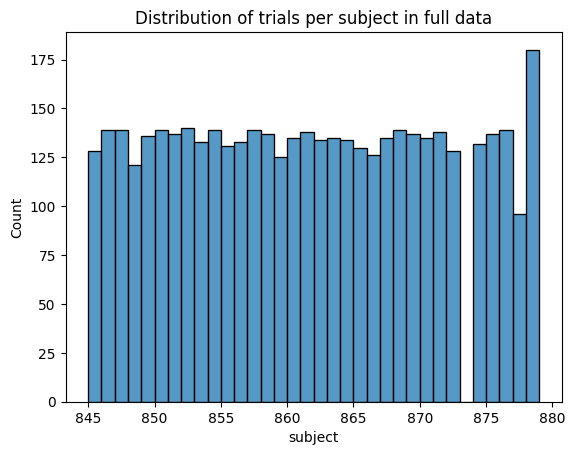

In [16]:
# plot the subject to the number of trials
plt.figure()
plt.title('Distribution of trials per subject in full data')
sns.histplot(data=cleanedSubjectInfo, x="subject", binwidth=1)
plt.show()

# Data Transformation

When we look at the distribution of the reaction times, we see that it is skewed to the right. This is a problem because most machine learning models assume that the data is normally distributed. 

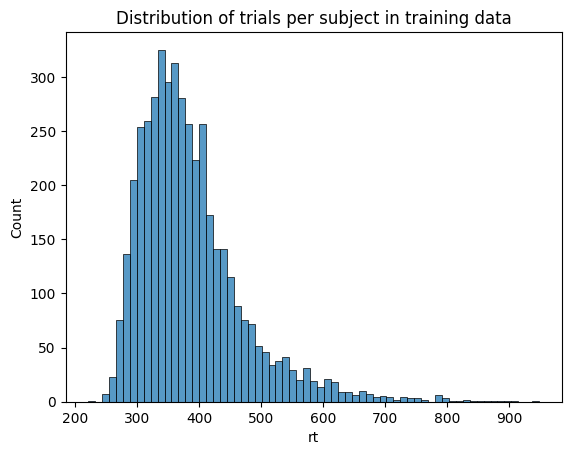

In [17]:
plt.figure()
plt.title('Distribution of trials per subject in training data')
sns.histplot(data=cleanedSubjectInfo, x="rt")
plt.show()

To fix this, we apply a log transformation to the reaction times. The result of the transformation is shown below.

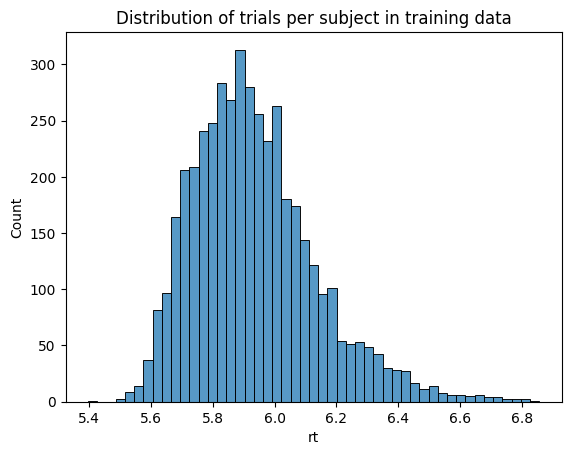

In [18]:
plt.figure()
plt.title('Distribution of trials per subject in training data')
sns.histplot(x=cleanedSubjectInfo.rt.apply(np.log))
plt.show()

Then we standardize the data. This means that we subtract the mean from each data point and divide by the standard deviation. Since the data is still slightly skewed, we use the median instead of the mean.  

This makes the data have a mean of 0 and a standard deviation of 1.  

We keep the parameters for mean and standard deviation. The result of the standardization is shown below.

In [19]:
rtmean = cleanedSubjectInfo.rt.apply(np.log).median()
rtstd = cleanedSubjectInfo.rt.apply(np.log).std()
print('mean: ', rtmean)
print('std:   ', rtstd)

mean:  5.909439791104729
std:    0.20024553121497682


In [20]:
def standardize(x, mean, std):
    return (x-mean)/std
def unstandardize(x, mean, std):
    return x*std+mean
def standardizeRT(x):
    return standardize(x, rtmean, rtstd)

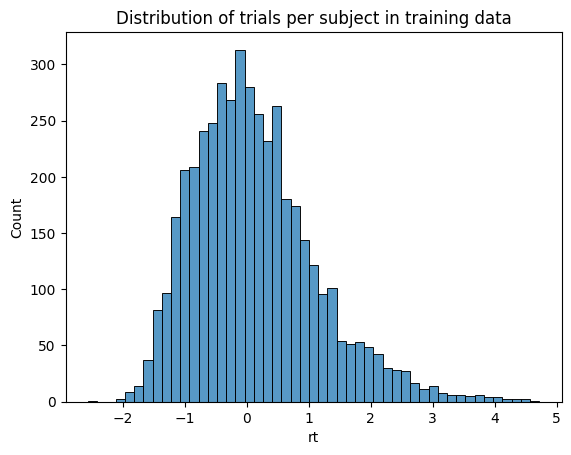

In [21]:
plt.figure()
plt.title('Distribution of trials per subject in training data')
sns.histplot(x=cleanedSubjectInfo.rt.apply(np.log).apply(standardizeRT))
plt.show()

In processData.py, we have a function called processRT.  
This function processes RT values according to the parameters, then unprocessRT which reverses this shown below.

In [22]:
def processRT(x):
    return np.log(x).apply(standardizeRT)

def unstandardizeRT(x):
    return x*rtstd+rtmean

def unprocessRT(x):
    return np.exp(x.apply(unstandardizeRT))

We also need to apply standardization to the pupilometry features. The parameters and result for the standardization are shown below.

The right_pupil and left_pupil data are also right skewed.  
We transform it similarly to the reaction times. 

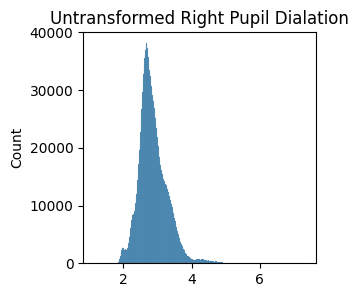

mean:  1.0298308234047164
std:   0.1408170702292441


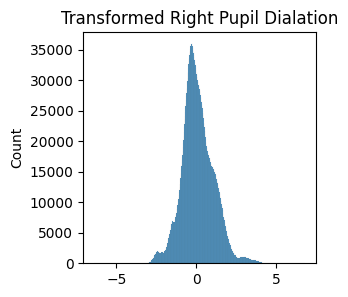

In [23]:
# before processing
plt.figure(figsize=(3, 3))
plt.title('Untransformed Right Pupil Dialation')
sns.histplot(x=cleanedData['right_pupil'].to_numpy())
plt.show()
temp = cleanedData['right_pupil'].apply(np.log)
rpmean = temp.median()
rpstd = temp.std()
#after processing
print('mean: ', rpmean)
print('std:  ', rpstd)
plt.figure(figsize=(3, 3))
plt.title('Transformed Right Pupil Dialation')
sns.histplot(x=cleanedData['right_pupil'].apply(np.log).apply(lambda x: standardize(x, rpmean, rpstd)).to_numpy())
plt.show()

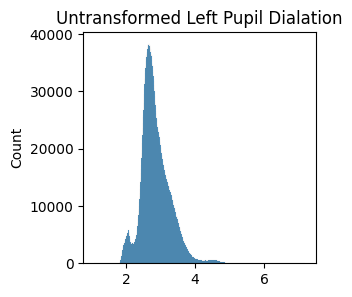

mean:  1.024794582075571
std:   0.14519670907378032


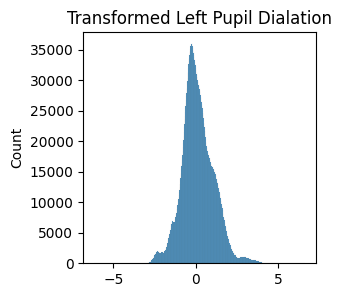

In [24]:
# before processing left pupil
plt.figure(figsize=(3, 3))
plt.title('Untransformed Left Pupil Dialation')
sns.histplot(x=cleanedData['left_pupil'].to_numpy())
plt.show()
temp = cleanedData['left_pupil'].apply(np.log)
lpmean = temp.median()
lpstd = temp.std()
print('mean: ', lpmean)
print('std:  ', lpstd)
plt.figure(figsize=(3, 3))
plt.title('Transformed Left Pupil Dialation')
sns.histplot(x=cleanedData['right_pupil'].apply(np.log).apply(lambda x: standardize(x, lpmean, lpstd)).to_numpy())
plt.show()

for the x and y features, we do not need to transform them because they are already normally distributed. but we do need to cut them off between 0 and 1.

In [25]:
# if more or less than 1 or 0 then return np.nan
def cutGaze(x):
    if x > 1 or x < 0:
        return np.nan
    else:
        return x

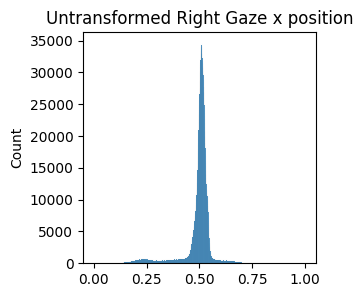

mean:  0.5089461
std:   0.07544981224141276


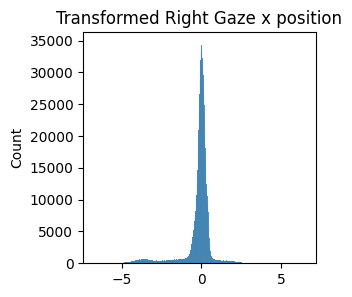

In [26]:
# Right Gaze x

plt.figure(figsize=(3, 3))
plt.title('Untransformed Right Gaze x position')
sns.histplot(x=cleanedData['right_gaze_x'].apply(cutGaze).to_numpy())
plt.show()

rgxmean = cleanedData['right_gaze_x'].apply(cutGaze).median()
rgxstd = cleanedData['right_gaze_x'].apply(cutGaze).std()
print('mean: ', rgxmean)
print('std:  ', rgxstd)

plt.figure(figsize=(3, 3))
plt.title('Transformed Right Gaze x position')
sns.histplot(x=cleanedData['right_gaze_x'].apply(cutGaze).apply(lambda x: standardize(x, rgxmean, rgxstd)).to_numpy())
plt.show()

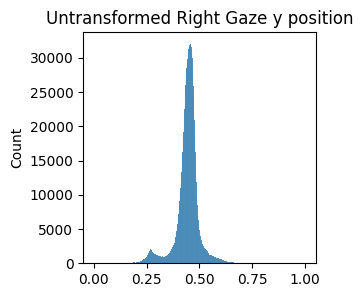

mean:  0.4495476
std:   0.06781282432116541


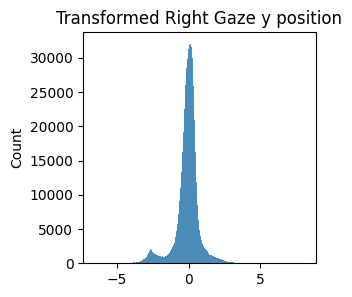

In [27]:
# Right Gaze y

plt.figure(figsize=(3, 3))
plt.title('Untransformed Right Gaze y position')
sns.histplot(x=cleanedData['right_gaze_y'].apply(cutGaze).to_numpy())
plt.show()

rgymean = cleanedData['right_gaze_y'].apply(cutGaze).median()
rgxstd = cleanedData['right_gaze_y'].apply(cutGaze).std()
print('mean: ', rgymean)
print('std:  ', rgxstd)

plt.figure(figsize=(3, 3))
plt.title('Transformed Right Gaze y position')
sns.histplot(x=cleanedData['right_gaze_y'].apply(cutGaze).apply(lambda x: standardize(x, rgymean, rgxstd)).to_numpy())
plt.show()

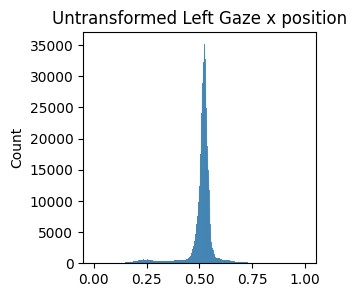

mean:  0.5207224
std:   0.07557125276888191


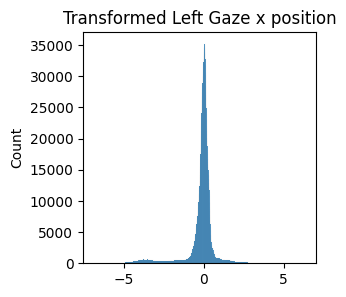

In [28]:
# Left Gaze x

plt.figure(figsize=(3, 3))
plt.title('Untransformed Left Gaze x position')
sns.histplot(x=cleanedData['left_gaze_x'].apply(cutGaze).to_numpy())
plt.show()

lgxmean = cleanedData['left_gaze_x'].apply(cutGaze).median()
lgxstd = cleanedData['left_gaze_x'].apply(cutGaze).std()
print('mean: ', lgxmean)
print('std:  ', lgxstd)

plt.figure(figsize=(3, 3))
plt.title('Transformed Left Gaze x position')
sns.histplot(x=cleanedData['left_gaze_x'].apply(cutGaze).apply(lambda x: standardize(x, lgxmean, lgxstd)).to_numpy())
plt.show()

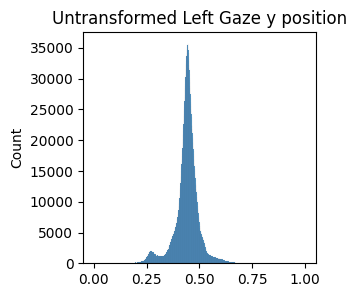

mean:  0.44419505000000004
std:   0.06809138358348428


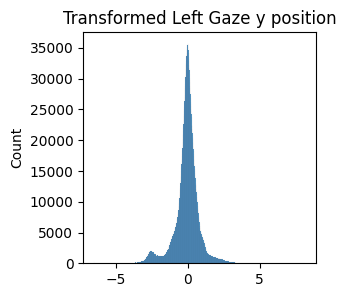

In [29]:
# left Gaze y

plt.figure(figsize=(3, 3))
plt.title('Untransformed Left Gaze y position')
sns.histplot(x=cleanedData['left_gaze_y'].apply(cutGaze).to_numpy())
plt.show()

lgyymean = cleanedData['left_gaze_y'].apply(cutGaze).median()
lgystd = cleanedData['left_gaze_y'].apply(cutGaze).std()
print('mean: ', lgyymean)
print('std:  ', lgystd)

plt.figure(figsize=(3, 3))
plt.title('Transformed Left Gaze y position')
sns.histplot(x=cleanedData['left_gaze_y'].apply(cutGaze).apply(lambda x: standardize(x, lgyymean, lgystd)).to_numpy())
plt.show()

Now we have a final function called processData to be used on any dataframe.

In [40]:
import processData
import importlib
importlib.reload(processData)

<module 'processData' from '/root/capstone/finalCode/data/processing/processData.py'>

In [42]:
cleanedData

,subject,time,trial,currentobject,rt,right_pupil,left_pupil,right_gaze_x,right_gaze_y,left_gaze_x,left_gaze_y
st,,,,,,,,,,,
"(848, 124)",848,1749235,124,NaN,19,3.897607,3.883394,0.509153,0.704280,0.622452,0.721363
"(848, 124)",848,1749243,124,Fixation,19,NaN,NaN,NaN,NaN,NaN,NaN
"(848, 124)",848,1749251,124,Fixation,19,NaN,NaN,NaN,NaN,NaN,NaN
"(848, 124)",848,1749259,124,Fixation,19,3.491655,3.542483,0.582957,0.736508,0.673403,0.743628
"(848, 124)",848,1749268,124,Fixation,19,3.813403,3.871302,0.497725,0.761927,0.599905,0.771075
...,...,...,...,...,...,...,...,...,...,...,...
"(865, 140)",865,2075600,140,Feedback,7125,3.692665,3.664004,NaN,1.509906,NaN,1.515521
"(865, 140)",865,2075608,140,Feedback,7125,NaN,NaN,NaN,NaN,NaN,NaN
"(865, 140)",865,2075616,140,Feedback,7125,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
processData.process(cleanedData)

,subject,time,trial,currentobject,rt,right_pupil,left_pupil,right_gaze_x,right_gaze_y,left_gaze_x,left_gaze_y
st,,,,,,,,,,,
"(848, 124)",848,1749235,124,NaN,-14.806826,2.347243,2.285967,0.002746,3.756410,1.504389,4.070525
"(848, 124)",848,1749243,124,Fixation,-14.806826,NaN,NaN,NaN,NaN,NaN,NaN
"(848, 124)",848,1749251,124,Fixation,-14.806826,NaN,NaN,NaN,NaN,NaN,NaN
"(848, 124)",848,1749259,124,Fixation,-14.806826,1.566181,1.653159,0.980929,4.231648,2.179691,4.397516
"(848, 124)",848,1749268,124,Fixation,-14.806826,2.192143,2.264489,-0.148716,4.606497,1.205551,4.800605
...,...,...,...,...,...,...,...,...,...,...,...
"(865, 140)",865,2075600,140,Feedback,14.791467,1.963665,1.885456,NaN,NaN,NaN,NaN
"(865, 140)",865,2075608,140,Feedback,14.791467,NaN,NaN,NaN,NaN,NaN,NaN
"(865, 140)",865,2075616,140,Feedback,14.791467,NaN,NaN,NaN,NaN,NaN,NaN
